## Atividade

Dada uma imagem de entrada f(x,y)

1. Obtenha a transformada rápida de Fourier (FFT) F(u,v) = F{f(x,y)} usando opencv e numpy.
2. Apresente as imagens Re{F(u,v)}, Im{F(u,v)} e |F(u,v)|. Mostre as visualizações com e sem o fftshift.
3. Efetue um escalonamento adequado de |F(u,v)| para melhor visualizar as baixas frequências
4. Crie um filtro passa-baixas com resposta em frequência |H(u,v)| e apresente o resultado da filtragem da imagem f(x,y) por esse filtro.
5. Faça o mesmo para um filtro passa-altas


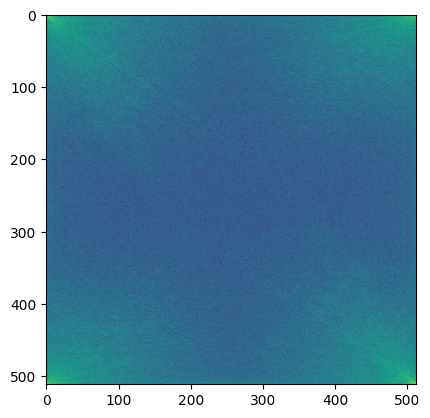

In [11]:
# 1. Obtenha a transformada rápida de Fourier (FFT) F(u,v) = F{f(x,y)} usando opencv e numpy.

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

fft = np.fft.fft2(img)
magnitude = np.abs(fft)

plt.imshow(np.log(1 + magnitude))


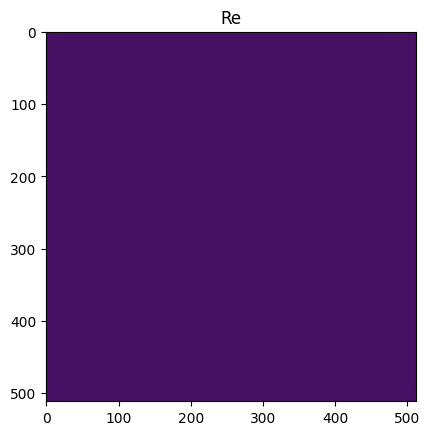

In [45]:
# 2. Apresente as imagens Re{F(u,v)}, Im{F(u,v)} e |F(u,v)|. Mostre as visualizações com e sem o fftshift.

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

fft = np.fft.fft2(img)
fftshift = np.fft.fftshift(fft)
re = np.real(fft)

plt.imshow(re)
plt.title('Re')
plt.show()


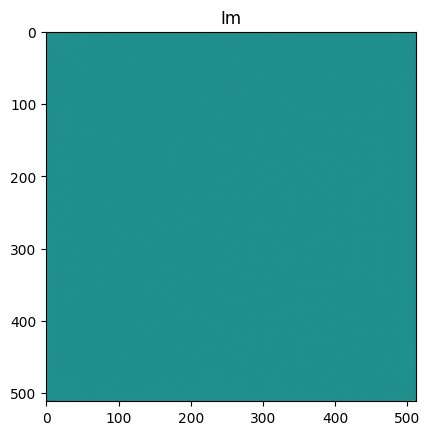

In [44]:
im = np.imag(fft)
plt.imshow(im)
plt.title('Im')
plt.show()

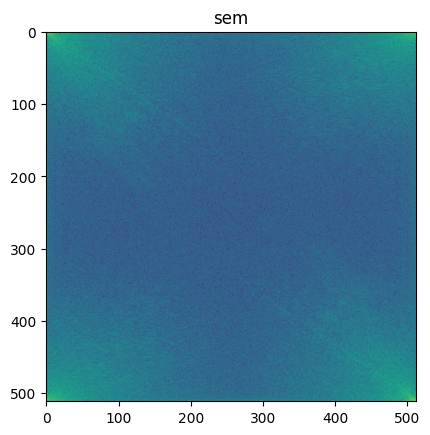

In [43]:
mag = np.abs(fft)
plt.imshow(np.log(1 + magnitude))
plt.title('sem')
plt.show()

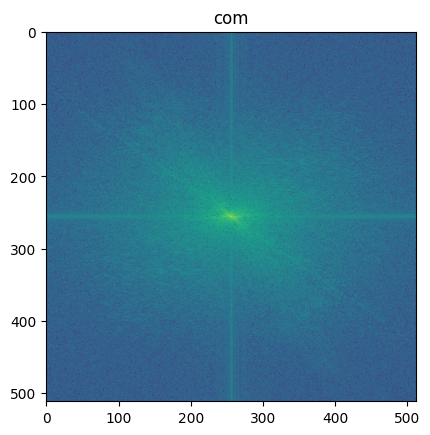

In [42]:
mag2 = np.abs(fftshift)
plt.imshow(np.log(1 + mag2))
plt.title('com')
plt.show()

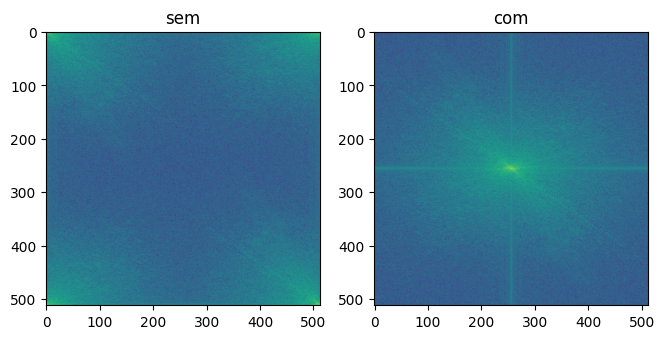

In [41]:
# 3. Efetue um escalonamento adequado de |F(u,v)| para melhor visualizar as baixas frequências

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

fft = np.fft.fft2(img)
fftshifted = np.fft.fftshift(fft)

mag = np.abs(fft)
log = np.log(1 + mag)
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 5)
plt.imshow(log)
plt.title('sem')

mag2 = np.abs(fftshifted)
log2 = np.log(1 + mag2)

plt.subplot(2, 3, 6)
plt.imshow(log2)
plt.title('com')

plt.show()


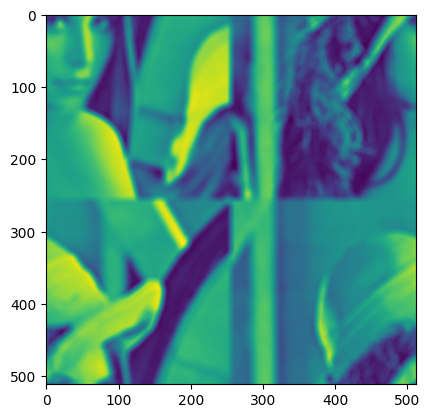

In [40]:
# 4. Crie um filtro passa-baixas com resposta em frequência |H(u,v)| e apresente o resultado da filtragem da imagem f(x,y) por esse filtro.

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
fft = np.fft.fft2(img)

w, h = img.shape
centrow, centroh = w // 2, h // 2
mask = np.zeros((w, h), np.uint8)
    
for i in range(w):
    for j in range(h):
        euclidiana = np.sqrt((i - centrow) ** 2 + (j - centroh) ** 2)
        if euclidiana <= 6:
            mask[i, j] = 1

filtrada = np.fft.fft2(mask, s=fft.shape)
resultadofiltro = np.multiply(fft, filtrada)
img2 = np.abs(np.fft.ifft2(resultadofiltro))

plt.imshow(img2)
plt.show()
